$$ \textbf{EE0826 Control Systems} $$

$$ \textbf{Simulation 4:} $$

$$ \textbf{Second order systems with conjugate poles} $$

$$ \text{Prepared by: Güray Gürkan, PhD} $$

$$ \text{Jan, 2019} $$

# Simulation 1
A real valued second order transfer function G(s) is known to have one pole at $ s = -6+8j$. Then;
- Construct G(s)
- Calculate and plot step response of G(s)

# Solution 1

If the system is real valued, then system should have conjugate pole pairs, thus, the system has the definition

$$ G(s)= \frac{K}{ (s- (-6+8j))(s-(-6-8j))} $$

In [2]:
# Solution 1
# Construction of G(s)

import control as ctl
K = 1.
G = ctl.tf(K,poly((-6+8j,-6-8j)))
print G


        1
----------------
s^2 + 12 s + 100



An alternative solution to find the coefficients is to use the quantities as 
$$b = - \sum p_i $$
$$c = \prod p_i = \| p_i\| ^2$$
where G(s) is defined as
$$ G(s)=\frac{K}{s^2+bs+c} $$
Thus, for the poles $p_1,p_2 = -6 \mp 8j $;
$$b = - \sum p_i = 12 $$
$$c = \prod p_i = \| p_i\| ^2 = 10^2 = 100$$
Thus, G(s) can be written as
$$ G(s) = \frac{K}{s^2+12s+100} $$

For K=1, the step response of the system is calculated as follows:

In [3]:
y, t = ctl.step(G)

Now, we can plot the step response:

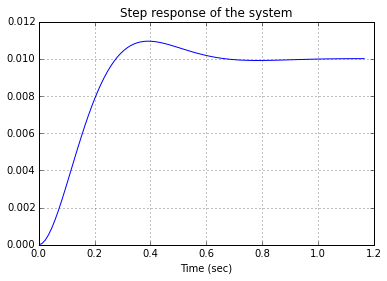

In [5]:
plot(t,y)
xlabel("Time (sec)")
title("Step response of the system (K=1)")
grid(1)

For K=1, the final value of the step response is 0.01. So, if K=100, the unit-step response will converge to unity.

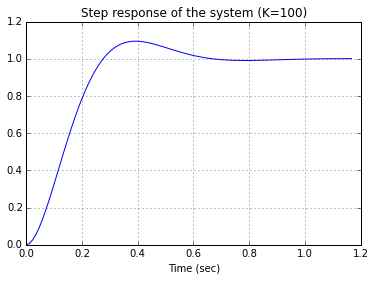

In [8]:
K = 100
G = ctl.tf(K,poly((-6+8j,-6-8j)))
y, t = ctl.step(G)
plot(t,y)
xlabel("Time (sec)")
title("Step response of the system (K=100)")
grid(1)


# Simulation 2


We want to observe a step response with the following observable parameters:
- An oscillation frequency of 4 Hz.
- Time constant of 2 seconds

Determine the pole locations of this system.

# Solution 2

For the pole locations $p_{1,2} = \alpha \mp j \beta$, the impulse response was derived to be

$$ h(t) = \frac{e^{-\alpha t}sin(\beta t)}{\beta} $$
whereas the step response has the equation 

$$ y(t) = A e^{-\alpha t} sin(\beta t + \theta) $$

Thus, the relationship between the oscillation frequency and $\beta $ is

$$  \beta = 2 \pi f_{osc} $$

Thus, we have $ \beta = 8 \pi $ rad/s

Decay factor $\alpha$  is inversely related to $\tau$:
$$ \alpha = \frac{1}{\tau}$$
Thus, we have $ \alpha = 0.5 $

Then; G(s) can be written as

$$ G(s) = \frac{K}{(s-(0.5+j8\pi))(s-(0.5-j8\pi))} $$

In [11]:
# Construction of G(s)
K=1.
G2 = ctl.tf(K,poly([-.5+8j*pi,-.5-8j*pi]))
print G2


       1
---------------
s^2 + s + 631.9



The norm square is:

In [16]:
pN=abs(-.5+8j*pi)
print pN**2

631.90468167


Then, for unity gain, we have K = 631.9:

In [17]:
K=pN**2
G2 = ctl.tf(K,poly([-.5+8j*pi,-.5-8j*pi]))
print G2


     631.9
---------------
s^2 + s + 631.9



Let's calculate and plot the step response of G2(s):

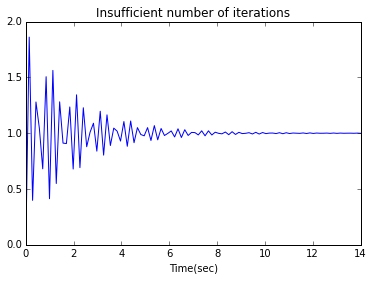

In [19]:
y2,t2 = ctl.step(G2)
plot(t2,y2)
title("Insufficient number of iterations")
xlabel("Time(sec)")

By default, the input arguments to $step()$ function is one. However, iteration times can also be given as input. 

(-0.2, 2.2)

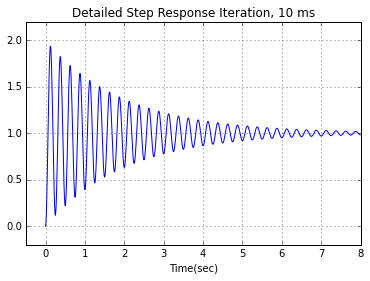

In [28]:
y2,t2 = ctl.step(G2,arange(0,8,.01))
plot(t2,y2)
title("Detailed Step Response Iteration, 10 ms")
xlabel("Time(sec)")
grid(1)
xlim(-0.5,)
ylim(-.2,2.2)

Now, if we zoom in, we can detect the oscillation period:

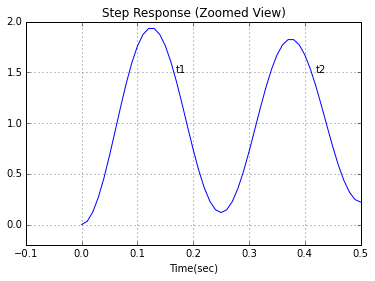

In [42]:
plot(t2,y2)
title("Step Response (Zoomed View)")
xlabel("Time(sec)")
grid(1)
T = 1/4. # period = 1/f 
xlim(-0.1,.5)
ylim(-.2,2)
text(.17,1.5,"t1")
text(.17 + T, 1.5,"t2")